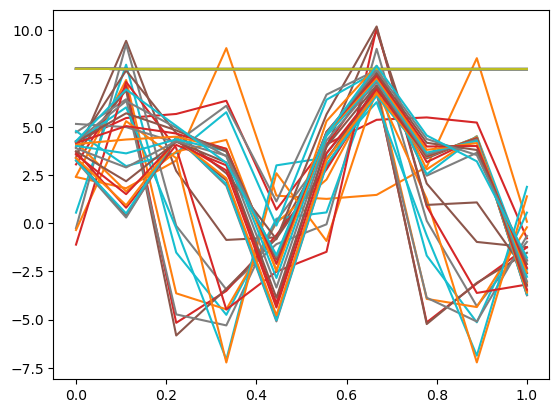

In [2]:

from scipy.integrate import odeint as odeint_scipy
import os
import shutil
import numpy as np
import pandas as pd
from threading import Thread
import matplotlib.pyplot as plt

def dlorenz96(t, u, F):
    dudt = np.zeros_like(u)

    for i in range(len(u)):
        dudt[i] = (u[(i+1)%len(u)] - u[i-2]) * u[i-1] - u[i] + F

    return dudt

def run_lorenz96(F = 8):
    nt = 50
    nx = 10
    T = 3.0
    t = np.linspace(0, T, nt)

    u0 = 8*np.ones((nx,))
    u0[0] += 0.01

    odefunc = lambda u_, t_: dlorenz96(t_, u_, F)
    
    ut = odeint_scipy(odefunc, u0, t)

    return ut

def generate_dataset():
    if os.path.exists('lorenz96_data'):
        shutil.rmtree('lorenz96_data')
    if os.path.exists('lorenz96_params.csv'):
        os.remove('lorenz96_params.csv')
    os.mkdir('lorenz96_data')
    
    param_list = []
    F = np.linspace(7, 9, 30)
    for Fi in F:
        param_list.append([Fi])
        ut = run_lorenz96(F = Fi)
        plt.plot(np.linspace(0, 1, len(ut[0,:])), ut[0])
        plt.plot(np.linspace(0, 1, len(ut[0,:])), ut[-1])

        df = pd.DataFrame(ut)
        df.to_csv(f'lorenz96_data/{Fi:0.3f}.csv', header=False, index=False)
    pd.DataFrame(param_list, columns=['F']).to_csv('lorenz96_params.csv', index=False)

if __name__ == '__main__':
    generate_dataset()